# Assignment 6: Classification with Logistic Regression

# Total: 20 pts

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

## The Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

You can read more about the data and the variables [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).


In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: 1 pt

Read in the `diabetes.csv` dataset. How many variables and how many observations? 


In [2]:
df = pd.read_csv('diabetes.csv')
df.shape
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 2: 1 pt

Then split the data into train and test for the outcome and the predictor variables.  Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
X = df.drop('Outcome', axis='columns')
y = df.Outcome

Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size=0.5, 
                                                random_state=0)

## Question 3: 1 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?  If it does, does this mean that `LogisticRegression` actually uses ridge regression or the LASSO as the default?

* What is the interpretation of the paramater `C`?  How does it relate to the regularization strength $\lambda$?


* If I were to ask you to use a regularization strengh of 2 (i.e. $\lambda=2$), what value of `C` would you pass?

Answer in the cell below using markdown

Answers go here!
* Yes, there is an l2 penalty by default. This means it uses ridge regression by default.
* Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization. C = INV(𝜆)
* 1/2

## Question 4: 3 pts

Create a instance of sklearn's `LogisticRegression` object for simple logistic regression (that is, the unpenalized version).  You will need to choose an alternative solver for `LogisticRegression` since the default solver does not support the no penalty option. Any solver will do, so just take a look at the docs to see what is available. I used `solver="newton-cg"` which seems to work fine.

Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, run a logisitic regression analysis of `Outcome` (y-variable) against `Glucose` (x-variable) on your training data. Make a scatter-plot of x and y and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

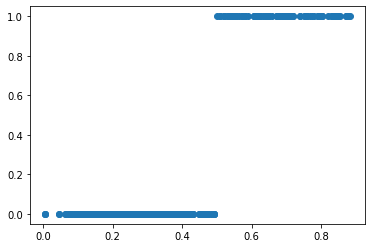

In [4]:
LR=  LogisticRegression(solver='newton-cg', penalty = 'none',max_iter=10000)
tempX = np.array(Xtrain['Glucose']).reshape(-1, 1)
LR.fit(tempX, ytrain)

## Scatter Plot
ytest_pred = LR.predict(tempX)
ytest_pred_prob = LR.predict_proba(tempX)
plt.scatter(ytest_pred_prob[:,1], ytest_pred)


## Question 5: 1 pt
Using the normal logistic regression from Question 4 to fit a model to predict outcome from all the variables in the data frame. Report the coefficients. Which variable increases the probability of having diabetes, and which variables decrease the probability of having diabetes. 

In [5]:
LR=  LogisticRegression(solver='newton-cg', penalty = 'none',max_iter=10000)
lr = LR.fit(Xtrain, ytrain)
lr.coef_

## It appears that the variables that increase the probability of diabetes are:
# Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age
## The variables that seem to decrease the probabilities are:
# Insulin,BloodPressure

array([[ 0.09842832,  0.03212676, -0.00774468,  0.00496927, -0.00134285,
         0.08025972,  1.09714211,  0.01828924]])

## Question 6: 3 pts

Use your model to construct a confusion matrix by fitting and predicting on the training data (I've inlcluded a little helper function to make looking at the confusion matrix a little easier). Then answer the following using the confusion matrix (don't use sklearn's functions):

* What is your model's training accuracy?
* What is your model's training precision?
* What is your model's training recall?

Confusion matrix, without normalization


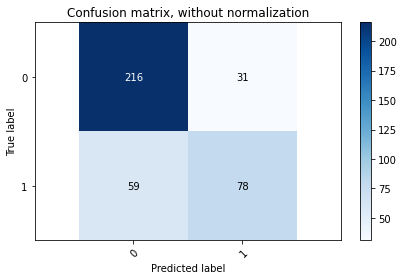

In [6]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax

y_true = ytrain
y_pred = lr.predict(Xtrain)
classes = lr.classes_
plot_confusion_matrix(y_true,y_pred, classes)

# What is your model's training accuracy?
# Accuracy 
    # = tp + tn / tp + tn + fp + fn 
    # = 216+28 /216 +78 + 31 + 69
    # = 0.765625
# What is your model's training precision?
# Precision
    # = tp / tp +fp
    # = 78 / 78 + 31
    # = 0.71
# What is your model's training recall?
# Recall
    # = tp / tp +fn
    # = 78 / 78 + 59
    # = 0.57

## Question 7:  1 pts

Estimate logistic regression's out of sample recall by using 5 fold cross validation.

In [7]:
cross_val_score(clf, Xtrain, ytrain).mean()

NameError: name 'clf' is not defined

## Question 8: 1 pt

Create new pipelines for l2 penalty in logistic regression and an l1 penalty.  Remember, penalized models perform best when you scale the inputs.  You should add `StandardScaler()` to your pipeline.

In [ ]:
model_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logistic', LogisticRegression(solver='saga'))
])

#interact_model = model_pipeline.fit(Xtrain,ytrain)

## Question 9: 3 pts

  Use sklearn's `GridSearchCV` to search over the regularization strength ranging from 0.1 to 1000 in 30 evenly spaced increments for your models. Vary the parameter evenly in log-space. Use recall as your metric for scoring.  
Plot the score for both lasso and ridge as a function of the log-regularization parameter. 

`GridSearchCV` is a way to cross validate your models for a variety of parameters.  Read more about `GridSearchCV` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Create a list of values of the regularization parameter
Cs = np.linspace(0.1,1000,30)
C = np.exp(Cs)
# Create a list of options for the regularization penalty
penalty = ['l1', 'l2']

parameters = dict(logistic__C=C,
                  logistic__penalty=penalty)

clf = GridSearchCV(model_pipeline, parameters, scoring='recall', verbose = 1)

clf.fit(Xtrain, ytrain)

scores = [x for x in clf.cv_results_['mean_test_score']]
scores = np.array(scores).reshape(len(penalty), len(Cs))

for ind, i in enumerate(penalty):
    plt.plot(Cs, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean score')
plt.show()

## Question 10: 1 pt

Print the cross validated recall for your regularized models.  If you called your model grid search `lasso_gscv` you can access the best model's score by performing `lasso_gscv.best_score_`.


In [ ]:
#Cross validated recall
clf.best_estimator_

## Question 11: 4 pts

LASSO makes the assumption that the model is what we call *sparse* (that means, not every variable is actually related to the outcome).  We can see which variables are more important than others by examining what is known as the *coefficient paths*.

Here are the steps to create the coefficient path:

1) Initialize an array of regularization strengths (typically going from something very small, maybe 0.1, to something very large, maybe 1000.

2) For each regularization strength, fit your model.  Keep track of the coefficients somehow, either by initializing an empty array to store the coefficients or by appending them to a list.

3) Plot the coefficient values against the log of the regularization strength.

For an example + example code - see Lab05 - last item. 

You've done this correctly if you can create a plot which looks like [this](https://cvxpy.readthedocs.io/en/latest/_images/lasso_regression_11_0.svg).

* Construct the coefficient path for logistic regression with an l1 penalty.
* Determine which coefficient is most strongly related to the outcome by examining which coefficent reaches 0 last.


In [ ]:
# Get a full path for Lasso
Cs = np.linspace(0.1,1000,100)
C = np.exp(Cs)
coefs = []
for i in range(len(C)):
    LR=  LogisticRegression(solver='saga', penalty = 'l1',max_iter=10000, C=C[i])
    lr = LR.fit(Xtrain, ytrain)
    coefs.append(lr.coef_)

In [ ]:
colors = ['b', 'r', 'g', 'c', 'k','c']
for i in range(len(lr.coef_)):
    y = [item[i] for item in coefs]
    l1 = plt.plot(Cs,y, c=colors[i])

In [10]:
lr.classes_ == [0,1]

array([ True,  True])